This notebook is used for developing and training model for sentiment analysis
The classification model is performed using bernoli model, SVC model and logistic regression model
Logistic regression model and word vectorizer are saved using pickle to be loaded for prediction around new data

In [1]:
#importing utilities
import re
import numpy as np
import pandas as pd

In [2]:
#importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#sklearn: importing classifiers
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [4]:
#sklearn: modelling 
from sklearn.model_selection import train_test_split

In [5]:
#Transforms text to feature vectors that can be used as input to estimator
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#Importing confusion matrics to show the graohical representation of model performances
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
#importing roc and auc tools
from sklearn.metrics import roc_curve, auc

In [8]:
import pickle

In [9]:
FILE_NAME = 'stockdata_training.csv'

In [10]:
#changing data type to lists
#text, target = list(data['text']), list(data['target'])
%run applying_textprocess.ipynb
#selecting text and target column for analysis
dataset=data[['text','target']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mshak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mshak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#separating input feature and label
#X=dataset.text
#y=dataset.target
X=data['text']
y=data['target']

In [12]:
X=X.apply(lambda x: ' '.join(x))

In [13]:
#splitting to train and test subsets (90% vs 10%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =1000)

In [14]:
#fit TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=15000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

In [15]:
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  15000


In [16]:
#Saving the trained vectorizer to be used in apply_model_stock notebook

In [17]:
with open('stock_vectorizer.pk', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [18]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
#function for model evaluation
#accuracy score, confusion matrix with plot. ROC_AUC curve

In [20]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [21]:
# model building

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       166
           1       0.72      0.84      0.77       206

    accuracy                           0.73       372
   macro avg       0.73      0.72      0.72       372
weighted avg       0.73      0.73      0.72       372



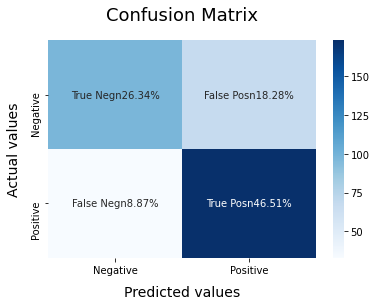

In [22]:
#bernoli model
#instantiate the model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict_proba(X_test)[::,1]

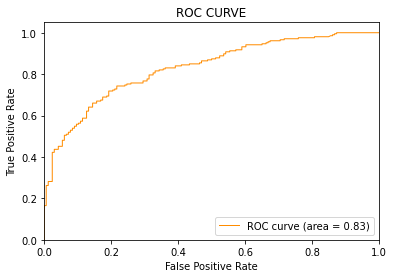

In [23]:
#roc curve for Logistic bernoli model
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#create ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       166
           1       0.79      0.79      0.79       206

    accuracy                           0.77       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.77      0.77      0.77       372



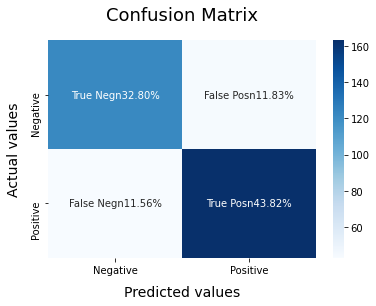

In [24]:
#SVC model
#instantiate the model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

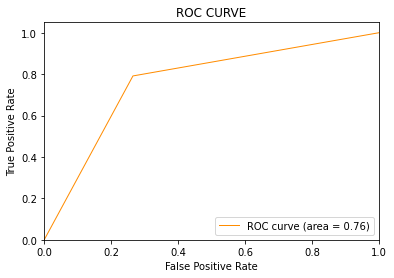

In [25]:
#roc curve of SVC model
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#create ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       166
           1       0.77      0.82      0.80       206

    accuracy                           0.77       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.77      0.77      0.76       372



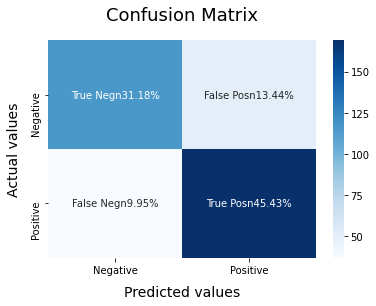

In [26]:
#logistic regression
#instantiate the model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
#fit the model using the training data
LRmodel.fit(X_train,y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict_proba(X_test)[::,1]

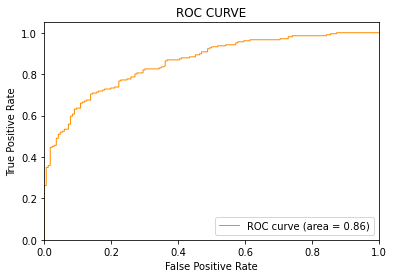

In [27]:
#roc curve for Logistic regression model
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#create ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

As the logistic regression model is performing better and it is well suited for classification problem, we save this to use on Amazon tweets

In [28]:
pickle.dump(LRmodel, open('stock_LRmodel.sav', 'wb'))